Setup

In [ ]:
import sys
sys.path.append("..")  # To import from src

# Project modules
from src.config import Config
from src.data_loader import load_data

# Standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
import re

# Download NLTK stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

# Config
cfg = Config()

# Load dataset
df = load_data(cfg.processed_data_dir / "dataset.csv")
print("✅ Data Loaded:")
df.head()

c:\Users\user\Desktop\FAN\CODESPACES\is-it-written-by-ai\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Data Loaded:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,Olympics-Rowing-U.S. Eight Beats Canada to Set...,0
1,What is quantum computing? It's an algorithm t...,1
2,AMD starts shipping 90-nanometer chips The chi...,0
3,"Ancient Olympics Mixed Naked Sports, Pagan Par...",0
4,Search Engine Forums Spotlight Links to this w...,0


Distribution and stats

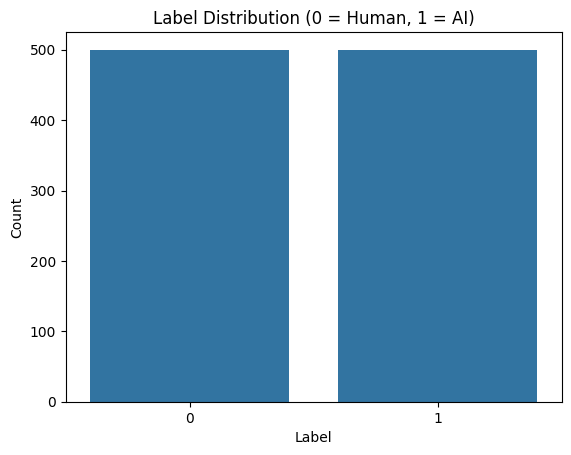

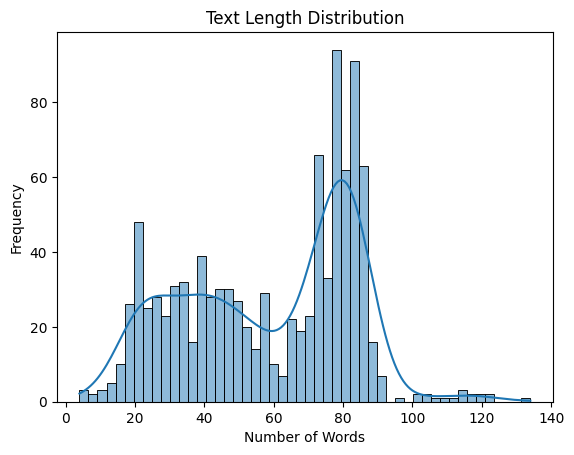

Average Length (words):


label
0    40.948
1    76.212
Name: length, dtype: float64

In [2]:
# Check label distribution
sns.countplot(x="label", data=df)
plt.title("Label Distribution (0 = Human, 1 = AI)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Add a text length column
df["length"] = df["text"].apply(lambda x: len(x.split()))
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print("Average Length (words):")
df.groupby("label")["length"].mean()


Sample

In [3]:
print("Human-written example:\n")
print(df[df['label'] == 0].iloc[0]['text'])

print("\nAI-generated example:\n")
print(df[df['label'] == 1].iloc[0]['text'])


Human-written example:

Olympics-Rowing-U.S. Eight Beats Canada to Set World Best Time  ATHENS (Reuters) - The United States beat Canada in a world  best time to qualify for the final of the men's Olympic eights  race Sunday, as the two crews renewed their fierce rivalry in  front of a raucous crowd at Schinias.

AI-generated example:

What is quantum computing? It's an algorithm that can solve a problem. It can be run in real time. It can be used to analyze data. There are some people who go, "Well, this is what you do, we don't need to do that." There's a real question there: why is the world such a boring place?"

Quantum computing: A world where you can do anything you want. It's a world where there is no privacy. It's a


Wordclouds

c:\Users\user\Desktop\FAN\CODESPACES\is-it-written-by-ai\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\FAN\CODESPACES\is-it-written-by-ai\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


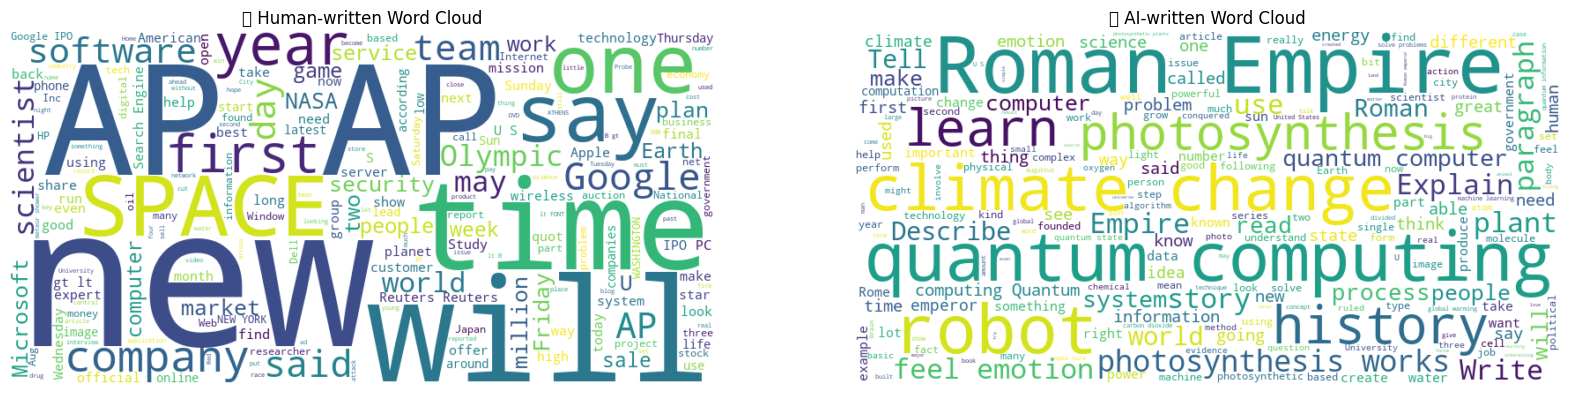

In [4]:
text_human = " ".join(df[df.label == 0].text)
text_ai = " ".join(df[df.label == 1].text)

wc_human = WordCloud(width=800, height=400, background_color="white").generate(text_human)
wc_ai = WordCloud(width=800, height=400, background_color="white").generate(text_ai)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(wc_human, interpolation='bilinear')
ax[0].set_title("🧠 Human-written Word Cloud")
ax[0].axis("off")

ax[1].imshow(wc_ai, interpolation='bilinear')
ax[1].set_title("🤖 AI-written Word Cloud")
ax[1].axis("off")

plt.show()

Most frequent words

In [5]:
def get_common_words(texts, top_n=20):
    stop_words = set(stopwords.words('english'))
    words = " ".join(texts).lower()
    words = re.findall(r"\b[a-z]+\b", words)
    filtered = [w for w in words if w not in stop_words]
    return Counter(filtered).most_common(top_n)

print("Top 20 Human Words:")
print(get_common_words(df[df.label == 0].text))

print("\nTop 20 AI Words:")
print(get_common_words(df[df.label == 1].text))

Top 20 Human Words:
[('ap', 145), ('new', 88), ('space', 77), ('reuters', 63), ('google', 58), ('lt', 55), ('gt', 55), ('com', 51), ('said', 46), ('could', 44), ('one', 43), ('first', 42), ('year', 37), ('company', 36), ('time', 35), ('scientists', 33), ('ipo', 33), ('software', 31), ('may', 30), ('team', 30)]

Top 20 AI Words:
[('quantum', 471), ('empire', 414), ('roman', 360), ('computing', 340), ('photosynthesis', 298), ('climate', 280), ('change', 264), ('robot', 260), ('emotions', 168), ('history', 161), ('feel', 159), ('works', 159), ('story', 128), ('explain', 123), ('paragraph', 123), ('write', 120), ('computer', 112), ('learns', 109), ('world', 106), ('first', 103)]


Text length comparison

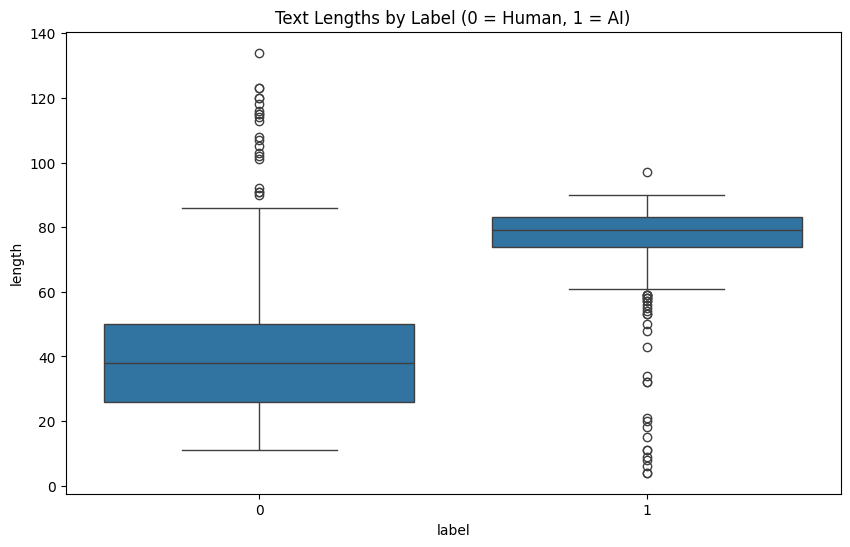

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="length", data=df)
plt.title("Text Lengths by Label (0 = Human, 1 = AI)")
plt.show()